In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as tts

In [2]:
# reading the dataset
col=['textID','Text','selected_text','sentiment']
train=pd.read_csv('train.csv')

In [3]:
# description the dataset
train.describe

<bound method NDFrame.describe of            textID  ... sentiment
0      cb774db0d1  ...   neutral
1      549e992a42  ...  negative
2      088c60f138  ...  negative
3      9642c003ef  ...  negative
4      358bd9e861  ...  negative
...           ...  ...       ...
27476  4eac33d1c0  ...  negative
27477  4f4c4fc327  ...  negative
27478  f67aae2310  ...  positive
27479  ed167662a5  ...  positive
27480  6f7127d9d7  ...   neutral

[27481 rows x 4 columns]>

In [4]:
# shape of the data
train.shape

(27481, 4)

In [5]:
# column names of the trainset
train.columns=col

In [6]:
train.head()

,textID,Text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
train['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


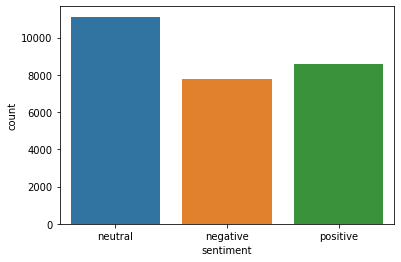

In [8]:
sns.countplot(train['sentiment'])

**So the Twitter Sentiment Extraction is an Sentiment Classification problem where we need to predict three diffrent sentiments of tweets.**

In [9]:
# changing the parameters
param={'neutral':0,'positive':1,'negative':2}
train['sentiment']=train['sentiment'].map(param)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


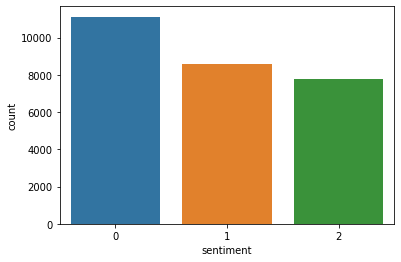

In [10]:
sns.countplot(train['sentiment'])

## Text Preprocessing

In [17]:
train['Text'].head()

0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
Name: Text, dtype: object

In [18]:
train.Text=train.Text.astype(str)

In [19]:
# removing the html tags
def clean_html(text):
    clean=re.compile('<.*?>')
    return re.sub(clean, '', text)
# first round of cleaning
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

# second round of cleaning
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text
    
cleaned_html=lambda x:clean_html(x)
cleaned1=lambda x:clean_text1(x)
cleaned2=lambda x:clean_text2(x)

train['Text']=pd.DataFrame(train.Text.apply(cleaned_html))
train['Text']=pd.DataFrame(train.Text.apply(cleaned1))
train['Text']=pd.DataFrame(train.Text.apply(cleaned2))

In [20]:
# chceking the made changes 
train.head()

,textID,Text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,"I`d have responded, if I were going",0
1,549e992a42,sooo sad i will miss you here in san diego,Sooo SAD,2
2,088c60f138,my boss is bullying me,bullying me,2
3,9642c003ef,what interview leave me alone,leave me alone,2
4,358bd9e861,sons of why couldnt they put them on the rel...,"Sons of ****,",2
